## **GrayRio: An Open-Source RISC-V Confidential Computing System**

<a href="https://colab.research.google.com/github/idea-fasoc/OpenFASOC/blob/main/docs/source/notebooks/temp-sense-gen/temp_sense_genCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
TBSI RIOS Lab Team, November 2022
SPDX-License-Identifier: Apache-2.0
```


|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Yihai Zhang (Leader) <br /> Email: zhang-yh22@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Qiaowen Yang <br /> Email: yqw21@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Xinlai Wan <br /> Email: wanxl21@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Chao Wang <br /> Email: wangchao20@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Dongyu Zhang <br /> Email: zdy22@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Zhixuan Xu <br /> Email: xzx21@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Peichen Guo <br /> Email: gpc22@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Zhengxuan Luan <br /> Email: luanzx22@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Mingzi Wang <br /> Email: wmz22@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Guohua Yin <br /> Email: ygh21@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Xinze Wang <br /> Email: xz-wang21@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Xiakai Pan <br /> Email: pxk21@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Zexin Fu <br /> Email: fzx20@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Yifei Zhu <br /> Email: zhuyf20@mails.tsinghua.edu.cn|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Xi Wang <br /> Email: xiwang@tsinghua.edu.cn |RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Lei Ren <br /> Email: ren@rioslab.org|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|WeiWei Chen <br /> Email: weiwei.c@rioslab.org|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|
|Zhangxi Tan (Advisor) <br /> Email: xtan@rioslab.org|RIOS Lab, Tsinghua-Berkeley Shenzhen Institute, Tsinghua University|No|No|


![greenrio_logo](https://media.giphy.com/media/WjIssiW28bhTXKJzvo/giphy.gif)

## Abstract

This notebook introduces **GrayRio: An Open-Source RISC-V Confidential Computing System**. 

GrayRio is an end-to-end, open-source research project targeting RISC-V confidential computing system with software-hardware codesign. We design a secure processor and SoC modules featuring physical memory protection (PMP) unit, crypto-engines, secure flash, true random number genenrator (TRNG), etc., in the GrayRio system to guarantee the strong isolation and protections of enclave applications against malicious privileged (i.e., OS) or user-level software. We employ the RISC-V Keystone as the trusted execution environment (TEE) to provide the software-end support of confidential computing. We have conducted an end-to-end study and implementations of the GrayRio system prototyping, including the software runtime, crypto-engine drivers, a cycle-accurate performance model, a functional simulator, Linux support with U/S/M-mode system, microarchitecture designs, ASIC back-end design and verifications employing openEDA flows and openPDKs, and the ultimate tape-out using efabless GF-MPW0 and OpenMPW-8 with GF 180 and SkyWater 130 process nodes, respectively. 

The GrayRio end-to-end system design endeavours are completely open-source in terms of the instruction set architecture (ISA), TEE software stacks, microarchitecture implementations, EDA backend flow, and ASIC tapeout. The GrayRio system is thus a perfect experimental platform and an implementation base for computer architecture and microarchitecture security research, which significantly faciliate the global open-source community. 


**_Index Terms:_** Confidential Computing, RISC-V TEE, Open-Hardware, Synthesizable design, ASIC, OpenEDA, OpenPDK



## Motivation
Confidential computing as an emerging industry initiative protects sensitive data and program execution in a hardware-based Trusted Execution Environment (TEE). It spans over diverse deployment environment such as cloud computing, data center, block-chain, secure banking, device attestation, machine learning, vehicle control system, etc. The mainstream CPU vendors introduce the trusted execution environments (TEEs), such as ARM TrustZone, Intel SGX, and AMD SEV to provide a confidential computing platform, commonly referred to as an enclave[1-3]. RISC-V also introduces Keystone, a light-weight TEE system independent from hardware implementations[1-3]. Keystone enclave can be customized for design trade-offs which is more flexible than TrustZone or SGX, in terms of the enclave memory size, encryption algorithms, security domains, etc.

However, current Keystone TEE implementations are based on software prototyping, wherein random key generations, attestation, encryption/decryption, measured boot, etc., are completely emulated using QEMU. Even though Keystone can be ported to existing commercial off-the-shelf (COTS) RISC-V SoCs, such as SiFive HiFive unleashed boards. While such systems lack of hardware security modules such as TRNG, secure flash, crypto-engine, etc.  As a result, neither performance nor microarchitecture security can be precisely validated by running TEE applications on such devices. In such case, the performance overhead triggered by the security characteristics cannot be accurately modeled and the profiling results of TEE applications cannot effectively expose the real performance bottleneck, which circumscribe the research of confidential computing system design and optimizations. Besides, there rarely exist any open-source, high-performance processor designs that take security into account, which circumscribes the value of open-source hardware design. 

Driven by the aforementioned issues, we introduce GrayRio, an open-source RISC-V small-board computer for confidential computing. GrayRio consists of a high-performance RISC-V multi-core processor and a secure SoC featuring security modules including crypto-engines, TRNG, secure flash, OTP, etc. GrayRio protects the data and program executions against attackers via isolating between enclaves and untrusted user-level applications as well as the malicious operating system (OS). Such strong isolation is guaranteed by employing a security monitor running in the machine-mode, and microarchitecture extensions. Further, we developed a scalable cycle-accurate performance model for GrayRio to facilitate the design space exploration and investigations of performance overhead attributed to TEE security extensions. Such software/hardware codesign model helps exploit accurate performance numbers of a TEE system and explore TEE design tradeoffs between system performance and security features. In addition, such end-to-end open-source contributions also shed a new light upon the RISC-V, Open-Hardware and OpenEDA communities to benefit the global open-source ecosystems. Rather than a naive conceptual prototyping, the verified GrayRio sillicon can serve as reliable academic research platforms and high-quality industrial productions, which dramatically enhances the value and impacts of open-source hardware designs.


## Background
Keystone is an open-source framework for building customized RISC-V TEEs, utilizing mechanisms of machine-mode security monitor (SM) and physical memory protection (PMP) units to guarantee memory isolation. Each isolated enclave has its own supervisor-mode runtime (RT) to replace the untrusted OS, which cleanly implements Figure0 enclave-specific functionality, communicates with the SM, and services the enclave user-mode application (eapp). PMP register entries store different memory region addresses (pmpaddr) and their respective access permissions (pmpcfg) which are checked upon each memory access. Figure 1 shows the Keystone framework and the PMP standard. 

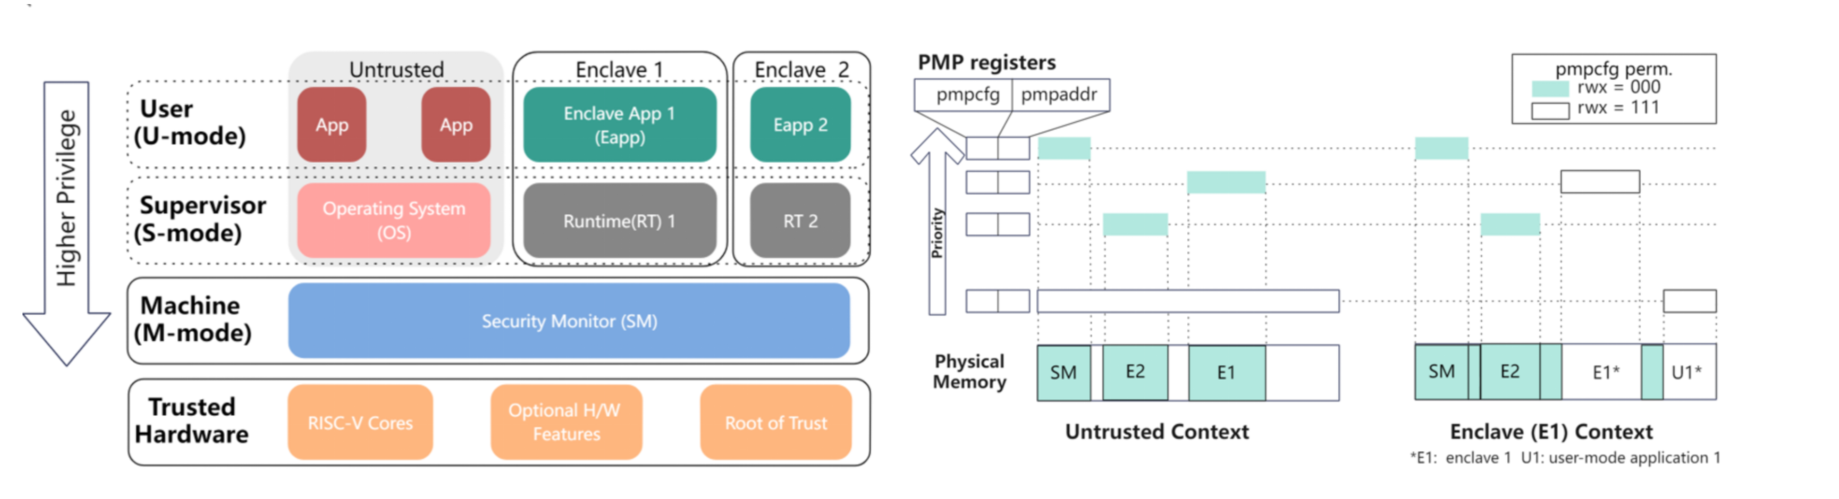

The design principles of Keystone aim at the flexibility of customization for various design trade-offs, providing security primitives instead of point-wise solutions. Keystone leverages a highly programmable trusted layer below the untrusted OS, and also decouples its isolation mechanisms from decisions of resource management, virtualization, and trust boundaries. These capabilities ensure quick prototyping, short turn-around time, and sufficient exploration and adaptation to threat models and design trade-offs. 

Current Keystone is implemented via software prototyping, wherein key generations, attestation, encryption/decryption, measured boot, etc., are all emulated using QEMU. Existing COTS RISC-V SoCs such as SiFive\HiFive unleashed boards lack of hardware security modules such as TRNG, secure flash, crypto engine, etc. Therefore, neither performance nor micro-architecture security can be precisely validated by running Keystone on such devices. In our GrayRio project, we plan to deploy Keystone on our GreenRio core and RainbowRio SoC to form a full-system implementation of RISC-V TEE so that the performance of Keystone paradigm can be more accurately profiled with SW/HW co-design.



## GrayRio Architecture Design



### **Overview**
The GrayRio is a security extension of GreenRio2 processor, which support Linux and Keystone mechanism. Therefore, we maintain similar implementations as shown in Figure 1. It is noteworthy that GrayRio design is scalable and independent from specific hardware implementation. We introduce extended microarchitecture security modules in the GrayRio chip:

1. Trusted Monitor Core: the trusted monitor core monitors the behavior of untrusted software running on computation cores. The monitor core does not execute any user applications. Instead, it serves as a co-processor responsible for the secure boot and external security services via PCIe. 

2. Secure Flash: The secure flash is a boot ROM containing all procedures required for a measured boot. It is read-only to application cores and is only readable upon the boot process. 

3. OTP (one-time writable memory): The laser-fuse OTP is write-protected after a single write at manufacturing time, which stores the device key pair.

4. TRNG (true random number generator): TRNG handles random key generations in the TEE system. 

5. Scratchpad memory (SPM): we employ an SPM per core to buffer software stacks (variables and contexts) during the boot process. 

6. SRAM: the SRAM is designed as a cache for crypto engines and TRNG for internal data processing. 

7. Crypto-Engine: the crypto-engine is a hardware accelerator of cryptographic algorithms like SHA3, etc.


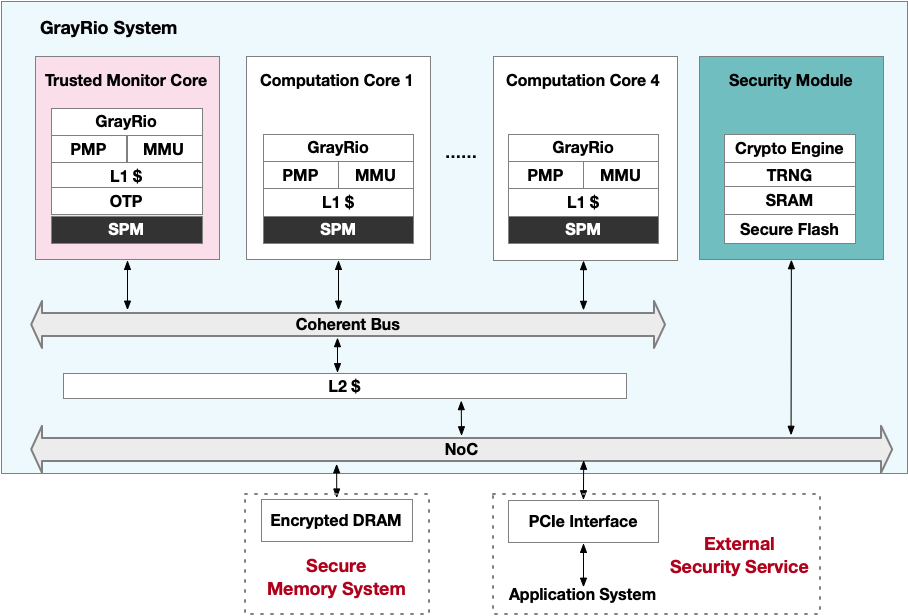



At present, the project is still in progress. Therefore, this notebook will focus on the work that has been completed.
The overall design architecture with progress is shown in the figure below. In the classification of progress, "finish" indicates that the basic programming work and basic verification have been completed, and "WIP" indicates that the module is still under development/verification.







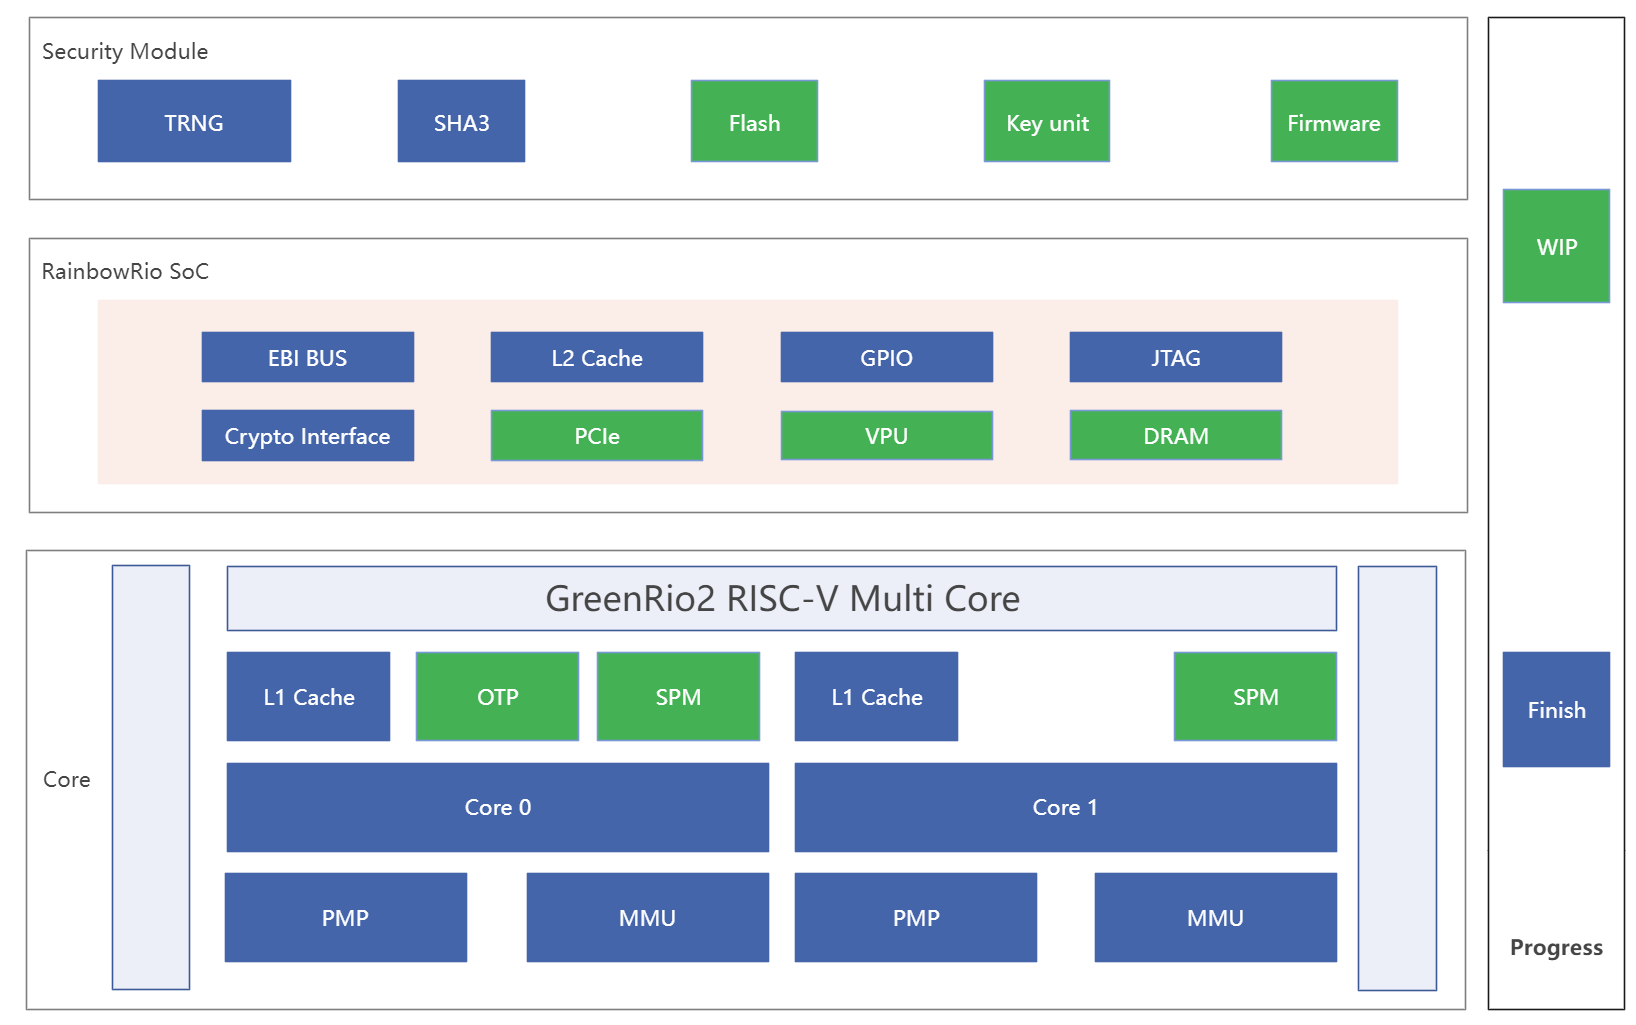


### Secure Boot

The trusted monitor core is booted first. It authenticates the bootup program stored in the secure flash via the crypto-engine. After the monitor core is booted, it boots the rest computation cores in a similar manner. Keystone’s attestation is based on measured boot, which generates the SM report at every boot. The SM report is used as evidence to attest that the SM has been initialized correctly with a securely generated attestation key.



### External Enclave Service

The GrayRio system can process external security service requests via the trusted monitor core.. The trusted monitor core processes the requests and authenticate user permissions. If the
check passes, the monitor core then initializes the enclave application (EApp) on application cores. Once the service is accomplished, the trusted monitor core transmits results back to the application system via PCIe.





### Crypto Engine Design







#### TRNG

The True Random Number Generator (TRNG) module implements a chain of three subsystems: entropy generation, entropy mixing, and random generation. 
- The entropy generation subsystem consists of at least two separate generators that collect entropy from independent physical processes. They have different types of entropy sources to provide redundancy as well as making it harder for an attacker to affect the system. 
- The entropy mixing subsystem reads 32-bit words from the entropy generators and collects them to be mixed and fed into a hash function (SHA-512) as 1024-bit message blocks. The digest is then extracted as a seed to the random generation unit.
- The random generation subsystem consists of a Cryptographically Secure Pseudo-Random Number Generator (CSPRNG) which implements the stream cipher ChaCha seeded with a 512-bit block, a 256-bit key, a 64-bit IV, and a 64-bit counter. Finally, random numbers of 32-bit are provided where the 512-bit blocks from ChaCha are divided into 16 32-bit words in sequence.



#### SHA-3

The SHA-3 (Secure Hash Algorithm 3) module implements the sponge construction approach defined in the SHA-3 hash standard. The sponge construction first does the padding process on the message depending on the hash length, and then breaks up the message into blocks to go through the input algorithm iterations called the absorbing phase and the output extraction function called the squeeze phase.

This implementation has a control register and a read-only status register to coordinate the processing flow. The control register has an “init” control bit used to absorb the first data block into the sponge, and a “next” control bit used to absorb subsequent blocks into the sponge. The status register has a “valid” control bit which is cleared as the absorbing phase starts and set after the operation is complete.

### Soc Design

RainbowRio is developing a full-system, full-stack SoC exploration and evaluation platform, aimed at providing an open-source SoC platform for Open Source Community members. OrangeRio platfrom includes an tiny but well-established SoC, high-performance L1 data Cache and L1 instruction Cache with supporting MMU. OrangeRio Platform can be seamlessly matched with GreenRio high-performace RISC-V processor, which gives great convenience to those who want to develop applications on RISC-V environment. This project uses only open source tool set for simulation, synthesis and backend tools. The whole flow follows the OpenLane methodology and the platform environment is compatible with efabless/carvel methodology. RainbowRio enables architects to make useful insights into how to utilize this platform to construct their own processor systems, making use of this streamlined flow to achieve rapid design iteration. 

#### Soc Diagram
![SoC diagram][soc_diagram_tag]

[soc_diagram_tag]: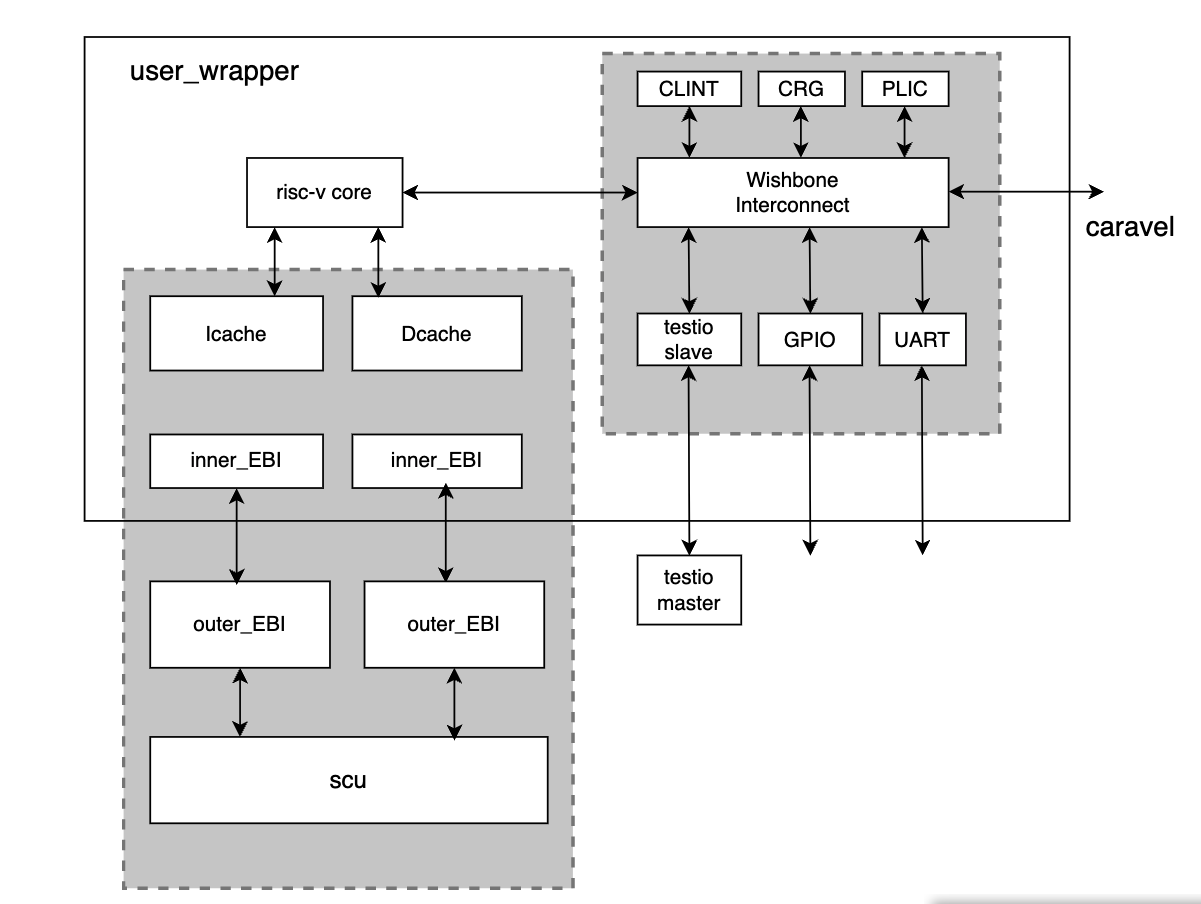


#### On-chip Interconnect System
This SoC consists of two essential parts. The first one is the on-chip interconnection system. We use wishbone as the peripheral bus, and leave the caravel interface for compatibility with openMPW. And the wishbone bus is connected to the peripheral UART, GPIO and Testio(for debug). And supports PLIC and CLINT modules, in which the memory mapped register is set to ensure that the Core can support Linux normally.


#### Inter-chip Interconnect System
The second system is the inter-chip interconnect system, we use the ACE bus to achieve inter-chip communication and cache coherence. In order to achieve our design one EBI(external bus interface) to act as die-to-die ACE bus signal transmitter. This interface is completely compatible with [ACE](https://developer.arm.com/documentation/ihi0022/e/ACE-Protocol-Specification) bus, providing this system with cache coherence capacity cross dies. SCU is also provided to control LLC and communicate with each levels' cache. 







#### EBI Interface for OpenMPW


Given the die area limitation of the OpenMPW project, a single chip cannot host the entire GrayRio system, therefore, we have to partition the core and the SoC into seprate chips. Besides, we implement the RainbowRio coherence fabric on the FPGA to bridge the connections among cores and coherent memory systems.
In order to achieve the interconnects between multiple core chips, we design the EBI(external bus interface) to act as die-to-die ACE bus signal transmmter. This interface is completely compatible with ACE bus, providing this system with cache coherence capacity cross dies. SCU is also provided to control LLC and communicate with each levels' cache. The respective layout is shown in the figure below.






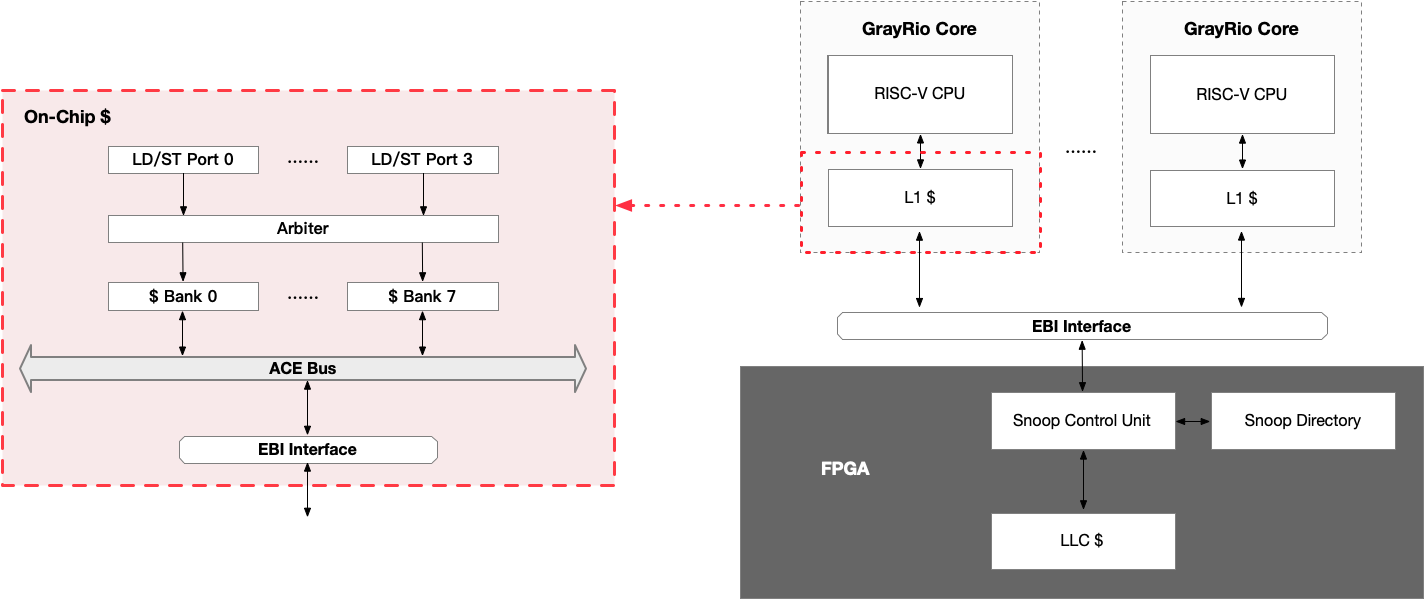






### CPU Design
GreenRio is dual-issue 7-stage out-of-order RISC-V core written in synthesizable Verilog that supports the RV64ICMA unprivileged ISA, Zicsr, Zifencei and Sfence.vma privileged ISA, support S, M and U mode.



#### Feature List
- It supports RISC-V ICMA extension
- It supports U S M mode
- It's a dual-issue out-of-order architecture
- It supports dynamic branch prediction(gshare)
- It executes speculatively according to prediction
- It supports scalar register renaming
- It supports TSO memory model
- It support out-of-order execution
- nonblocking cache
- It implements mmu with 3 level page table in sv39 mode
- It supports Linux
- cache coherence

#### Core Architecture Diagram
![GreenRio.png][GreenRio_png]

[GreenRio_png]: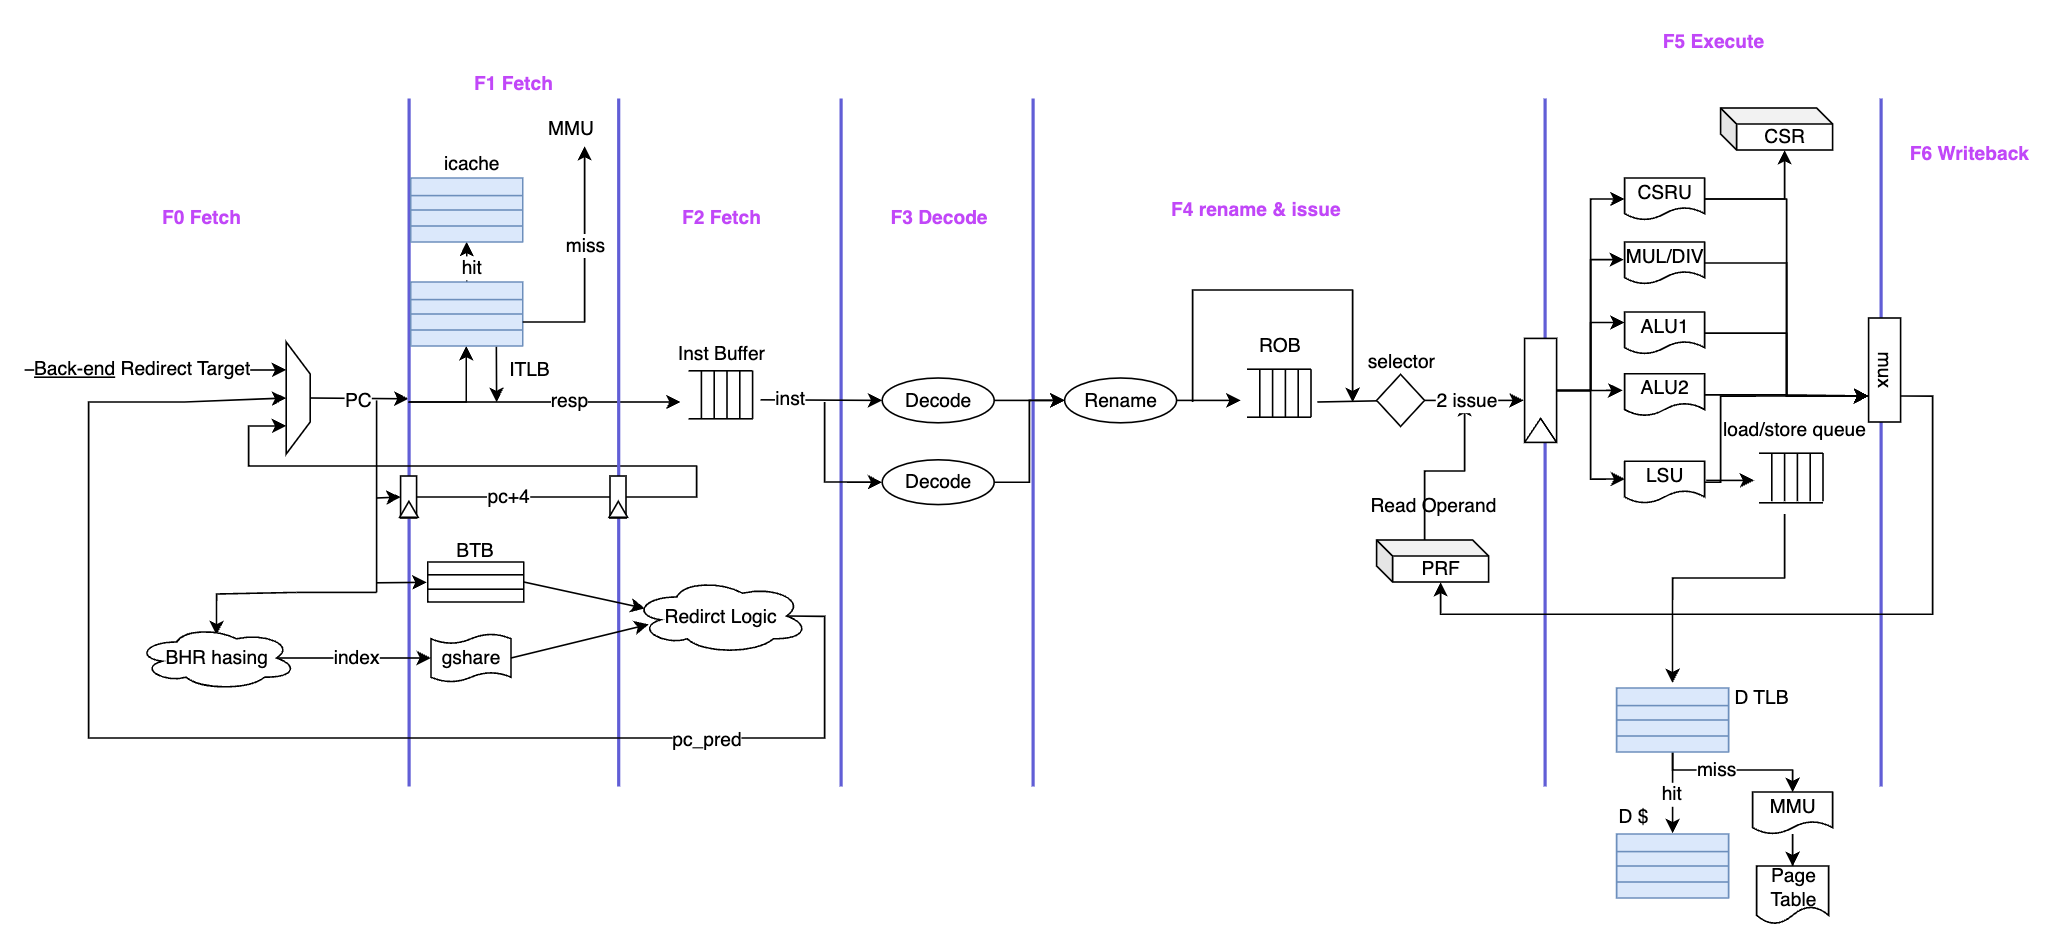

#### CPU Microachitecture

Fetch

    · Instructions are fetched from Icache and pushed into a FIFO queue, known as the instruction buffer (2 lines * 16B)
    · Bypass is supported when buffer miss, instructions can come directly from new cacheline
    · To send requests to Icache, we need to look up tlb
    · Looking up the branch target buffer also occurs in this stage, redirecting the fetched instructions as necessary
    · BTB and gshare for prediction

Decode

    · Support RISC-V RV64ICMA, Fence, ZiFencei, Sfence.VMA

Retire Control Unit

    · Including renaming table, free list, available table, reorder buffer and physical register file
    And support the two issue policy: oldest 2 instruction issues
    · The decoded instruction will be both witten to reorder buffer and issue to issue queue if it can be issued.
    The write-back data could both write back to the physical register file and bypass an issued instruction which has dependency on the data
    · most 2 commitment in a cycle
    The core support commit instruction in sequence, and handle exception and predict miss at commitment point
    · Interact with BTB and Gshare
    result of branch and jump instruction will update BTB and Gshare

Execution

    · The function unit including two ALUs , a LSU(load store unit), a MDU(multiply and divide unit) and a CSRU
    · ALU cost just 1 cycle
    · Multiplier in MDU cost just 3~5 cycle
    · divider in MDU cost just 64 cycle
    · CSRU cost just 1 cycle

LSU

    · Load and store operation are sequence consistency
    · There is wake-up mechanism for store operation. 
    When the store instruction is the oldest one in the Rob, it will be waked up and sent to cache

Memory Management Unit

    · GreenRio provides support for SV39 virtual memory system
    Necessary units for translating, mapping and address caching are integrated in MMU module
    GreenRio is implemented with seperated TLB (Translation Lookaside Buffer) for data and instructions
    This module contains DTLB, ITLB, Page-Table walker and an arbitrator scheduling translation requests from DTLB and ITLB to PTW

    · MMU module handles translation requests from both LSU and IFU, where either load/store requests or load-only requests are generated
    Translation will be looked up within TLB with VPN as index. DTLB and ITLB can be queried simutainously 
    Once TLB returns a cached PTE (Page Table Entry) with coresponding PPN, MMU will return a hit signal and finish serving the request
    Otherwise TLB may generate walking request to PTW to refill the missing PTE. PTW walks the page-tables through ports connecting L1 data cache
    In handling a TLB miss, MMU will continously set the miss signal until either all page table walking is down or exception is raised

Cache

    · Non-blocking cache
    it can still accept requests when miss happens in the cache, because the mshr depth is greater than one, so it can also response the LSU out-of-order
    · VIPT
    it apply the virtual index and physical tag principle
    · Multi-ports for LSU
    to increase the performance of cache, it has multi-ports for the LSU requests
    · Multi-banks
    this cache has eight banks, each bank has only one request port and it is only responsible for the corresponding address




## Install Dependencies

In [ ]:
import os
import pathlib
import sys

!curl -Ls https://micro.mamba.pm/api/micromamba/linux-64/latest | tar -xvj bin/micromamba
conda_prefix_path = pathlib.Path('conda-env')
site_package_path = conda_prefix_path / 'lib/python3.7/site-packages'
sys.path.append(str(site_package_path.resolve()))
CONDA_PREFIX = str(conda_prefix_path.resolve())
PATH = os.environ['PATH']
LD_LIBRARY_PATH = os.environ.get('LD_LIBRARY_PATH', '')
%env CONDA_PREFIX={CONDA_PREFIX}
%env PATH={CONDA_PREFIX}/bin:{PATH}
%env LD_LIBRARY_PATH={CONDA_PREFIX}/lib:{LD_LIBRARY_PATH}
!bin/micromamba create --yes --prefix $CONDA_PREFIX
!echo 'python ==3.7*' >> {CONDA_PREFIX}/conda-meta/pinned
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel litex-hub \
                        --channel main \
                        open_pdks.sky130a \
                        magic \
                        openroad \
                        netgen \
                        yosys 
!bin/micromamba install --yes --prefix $CONDA_PREFIX \
                        --channel conda-forge \
                        tcllib gdstk pyyaml click

bin/micromamba
env: CONDA_PREFIX=/content/verilator/conda-env
env: PATH=/content/verilator/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin
env: LD_LIBRARY_PATH=/content/verilator/conda-env/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

Empty environment created at prefix: /content/verilator/conda-env

                                           __
          __  ______ ___  ____ _____ ___  / /_  ____ _
         / / / / __ `__ \/ __ `/ __ `__ \/ __ \/ __ `/
        / /_/ / / / / / / /_/ / / / / / / /_/ / /_/ /
       / .___/_/ /_/ /_/\__,_/_/ /_/ /_/_.___/\__,_/
      /_/

[+] 0.0s
[+] 0.1s
litex

## Backend Flow

### Core Backend Flow

#### Starting Our project
We created a new repository based on the caravel_user_project template. Therefore, the deployment steps are the same.

#### **Why Not Colab Jupyter?** **（Important!)**
<mark>**Issue: Large memory usage (over 50 GB) of backend EDA flow exceeds the upper limit of available memory of CoLab Pro (25GB) due to the design complexity !!!**</mark>

Our design is based on the iteration of GreenRio 1.0 (which has been passed pre-check in OpenMPW-7).

We tried to run GrayRio with Openlane it in Colab.

Unfortunately, because of the **high memory usage**, Colab always ended the process because OpenROAD unexpectedly exited. We have upgraded to Colab Pro, but the memory usage still exceeded 25GB, which occurs in detailed routing. 

***Solution:***

Therefore, we have to run the RTL-GDS flow locally based on the efabless template. 

We put the deployment guidance of the experimental environment below and give our experimental results. 

Please follow the steps below to perform replication and research on the local machine (memory capacity is recommended to be greater than 32G).

**Our experimental platform**: 128G of memory (the actual maximum occupied is 48G).Besides, the number of routing cores is 48, and the total time is more than 6 hours.



In [ ]:
## The code here cannot be run directly in the colab! Please note that! The code here suggests that you run it on a local machine.
## Code cannot be run in Colab here
!git clone https://github.com/0616ygh/GreenRio2Chip.git
%cd GreenRio2Chip
!source env.sh
!make setup
%cd openlane
!make greenrio2

In this process, the config.tcl we designed for GreenRio2 is as follows.

In [ ]:
## This file is in GreenRio2Chip/openlane/greenrio2. This is only for reading as a document, not for running directly.
%%writefile config.tcl
set ::env(DESIGN_NAME) "core_top"
set ::env(DESIGN_IS_CORE) 1
set ::env(CLOCK_PERIOD) "40"
set ::env(CLOCK_PORT) "clk"
set ::env(GLB_RESIZER_TIMING_OPTIMIZATIONS) 0
set ::env(ROUTING_CORES) 48
set ::env(FP_SIZING) "absolute"
set ::env(DIE_AREA) "0 0 4000 4000"
set ::env(PL_TARGET_DENSITY) 0.32
set ::env(DIODE_INSERTION_STRATEGY) 4
set ::env(SYNTH_STRATEGY) "AREA 0"
set ::env(SYNTH_MAX_FANOUT) 20
set ::env(PL_RESIZER_TIMING_OPTIMIZATIONS) 0
set ::env(RUN_SPEF_EXTRACTION) 0
set ::env(GRT_ALLOW_CONGESTION) 1
set ::env(VERILOG_FILES) "\
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/params.vh \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/hehe_cfg.vh \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/csr/csr_regfile.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/unit/counter/configurable_counter.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/unit/f2if2o/f2if2o.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/decode/rvc_decoder.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/decode/rv_decoder.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/decode/decode.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/csr/excep_ctrl.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/unit/counter/counter.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/unit/fifo/fifo_for_freelist.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/fetch/btb.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/fetch/gshare.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/fetch/ins_buffer.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/fetch/fetch.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/counter2.sv \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Basic/hw/CountOne.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Basic/hw/MuxOH.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Basic/hw/OH2UInt.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Basic/hw/PLRU.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Basic/hw/PLRUTree.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Basic/hw/PriorityMux.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Basic/hw/StreamFIFO.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Basic/hw/SyncFIFO.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Queue/hw/AgeMatrixSelector.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Queue/hw/QueueManager.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Queue/hw/StaticPrioritySelector.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Queue/hw/FIAO/FIAOWithAgeMatrix.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Queue/hw/FIAO/FIAOWithQueueManager.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/Queue/hw/FIFO/MultiPortStreamFIFO.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/StdDFF/dv/DFFUncertainChecker.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/StdDFF/hw/DFF.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/StdDFF/hw/DFFE.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/StdDFF/hw/DFFR.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/utils/commoncell/src/StdDFF/hw/DFFRE.sv \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/unit/oldest2_abitter/arbiter_base.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/lsuv1/lsu_agu.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/lsuv1/lsu_bus_ctrl.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/lsuv1/lsu_lsq_entry.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/lsuv1/lsu_lsq.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/lsuv1/lsu_mc.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/lsuv1/lsu_pma_checker.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/lsuv1/lsu_wb_arb.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/lsuv1/lsuv1.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/csr/csr.sv \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/fu/alu.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/fu/div.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/fu/lowRisc_mul_fast.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/fu/md.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/fu/fu.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rvh_mmu_v/rvh_ptw.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rvh_mmu_v/rvh_tlb_arbiter.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rvh_mmu_v/rvh_pmp/rvh_pmp.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rvh_mmu_v/rvh_pmp/rvh_pmp_entry.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rvh_mmu_v/rvh_dtlb.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rvh_mmu_v/rvh_itlb.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rvh_mmu_v/rvh_mmu_mshr.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rvh_mmu_v/rvh_mmu.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rvh_mmu_v/rvh_monolithic_mmu.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/unit/physical_regfile/physical_regfile.sv \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/unit/f2if2o/f2if2o_freelist.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/unit/oldest2_abitter_bps/oldest2_abitter_bps.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/unit/oldest2_abitter_bps_lss/oldest2_abitter_bps_lss.v \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/rcu/rcu.sv \
	 $::env(DESIGN_DIR)/../../verilog/GreenRio2/core.sv"
 set ::env(LEC_ENABLE) 0
 set ::env(RUN_CVC) 0
 set ::env(USE_ARC_ANTENNA_CHECK) "1"
 set ::env(RT_MAX_LAYER) {met5}
 set ::env(QUIT_ON_TIMING_VIOLATIONS) "0"
 set ::env(QUIT_ON_MAGIC_DRC) "0"
 set ::env(QUIT_ON_LVS_ERROR) "0"
 set ::env(QUIT_ON_SLEW_VIOLATIONS) "0"
 set ::env(RUN_KLAYOUT_XOR) "0"
 set ::env(KLAYOUT_XOR_GDS) "0"
 set ::env(KLAYOUT_XOR_XML) "0"
 set ::env(RUN_KLAYOUT) "0"
 set ::env(RUN_MAGIC_DRC) 0
 set ::env(RUN_KLAYOUT_DRC) 0

After "make greenrio2", the flow of RTL-GDS starts running. Our testing time exceeded 6 hours. If the number of CPUs is small, the running time may be longer. Here are our results.This experimental result has been put on gitlab.

In [ ]:
!git clone https://gitlab.com/yghlovelyf0616/greenrio2result.git

Cloning into 'greenrio2result'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 126 (delta 43), reused 112 (delta 40), pack-reused 0
Receiving objects: 100% (126/126), 391.81 MiB | 13.64 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Checking out files: 100% (97/97), done.


#### Display layout

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


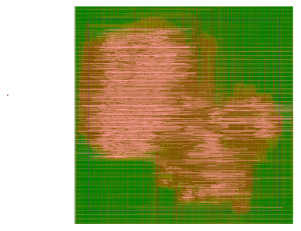

In [ ]:
##The current GDS size is 789MB, which takes too long to open in Python. We use Klayout to open and take a screenshot. If you want, you can also try to open it with klayout or the optimized Python script.
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
lena = mpimg.imread('greenrio2result/results/gds.png') 
lena.shape [:3]
plt.imshow(lena) 
plt.axis('off') 
plt.show()

#### Dump flow report

In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('greenrio2result').glob('reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

,0
design,/home/yinguohua/rioschip/openlane/new
design_name,core_top
config,22_11_25_02_27
flow_status,flow completed
total_runtime,6h15m4s0ms
routed_runtime,3h43m54s0ms
(Cell/mm^2)/Core_Util,-2.0
DIEAREA_mm^2,16.0
CellPer_mm^2,-1
OpenDP_Util,9.9


### Soc Backend Flow

#### Import Source Code

In [ ]:
!rm -rf GreenRio_uncore
!git clone https://github.com/zhengxuan-luan/GreenRio_uncore.git

Cloning into 'GreenRio_uncore'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (606/606), done.
remote: Compressing objects: 100% (424/424), done.
remote: Total 606 (delta 195), reused 567 (delta 161), pack-reused 0
Receiving objects: 100% (606/606), 4.06 MiB | 15.88 MiB/s, done.
Resolving deltas: 100% (195/195), done.


#### SoC

##### Write configuration

In [ ]:
%%writefile clock.sdc
create_clock -name perips_clk -period 20.000 [get_ports {clk}] 
set_propagated_clock [get_clocks {clk}] 
create_clock -name testio_clk -period 20.000 [get_ports {testio_clk}] 
set_propagated_clock [get_clocks {testio_clk}] 


Writing clock.sdc


In [ ]:
%%writefile config.tcl
set ::env(DESIGN_NAME) soc_top

set ::env(VERILOG_FILES) "\ 
GreenRio_uncore/rtl/perips/on_chip/*.v \
GreenRio_uncore/rtl/perips/on_chip/perips_cfg.vh"

set ::env(CLOCK_PORT) "clk testio_clk"

set ::env(PL_RANDOM_GLB_PLACEMENT) 0
set ::env(CLOCK_PERIOD) {20.0}
set ::env(RT_MAX_LAYER) {met4} 
set ::env(RUN_FILL_INSERTION) 1 
set ::env(RUN_TAP_DECAP_INSERTION) 1 
set ::env(QUIT_ON_LVS_ERROR) "0" 
set ::env(QUIT_ON_MAGIC_DRC) "0" 
set ::env(QUIT_ON_NEGATIVE_WNS) "0" 
set ::env(QUIT_ON_SLEW_VIOLATIONS) "0" 
set ::env(QUIT_ON_TIMING_VIOLATIONS) "0" 
set ::env(SYNTH_MAX_FANOUT) 20 
set ::env(RUN_CVC) 0 
set ::env(GRT_MAX_DIODE_INS_ITERS) 5 

set ::env(SDC_FILE) "./clock.sdc" 
set ::env(BASE_SDC_FILE) "./clock.sdc" 

# set ::env(FP_SIZING) absolute
# set ::env(DIE_AREA) "0 0 850 850"
set ::env(FP_CORE_UTIL) 23
set ::env(PL_TARGET_DENSITY) 0.25
set ::env(SYNTH_STRATEGY) "AREA 3"
set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6

# set ::env(DIODE_INSERTION_STRATEGY) 4

# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

set ::env(PL_RESIZER_TIMING_OPTIMIZATIONS) 1
# set ::env(PL_RESIZER_HOLD_SLACK_MARGIN) 0
# set ::env(PL_RESIZER_SETUP_SLACK_MARGIN) 0
set ::env(GLB_RESIZER_TIMING_OPTIMIZATIONS) 1

# set ::env(SYNTH_READ_BLACKBOX_LIB) 1
# set ::env(VERILOG_FILES_BLACKBOX) "\
#     GreenRio_uncore/rtl/perips/on_chip/sky130_fd_sc_hd.v \
# 	"
# set ::env(EXTRA_LEFS) "GreenRio_uncore/rtl/macros/lef/sky130_fd_sc_hd.lef"
# set ::env(EXTRA_GDS_FILES) "GreenRio_uncore/rtl/macros/gds/sky130_fd_sc_hd.gds"

Writing config.tcl


##### Run OpenLane Flow

In [ ]:
# !rm -rf OpenLane                        
!git clone --depth=1 https://github.com/The-OpenROAD-Project/OpenLane
import os
import pathlib
OPENLANE_ROOT=str(pathlib.Path('OpenLane').resolve())
PATH=os.environ['PATH']
%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env TCLLIBPATH={CONDA_PREFIX}/lib/tcllib1.20
%env OPENLANE_ROOT={OPENLANE_ROOT}
%env PATH={PATH}:{OPENLANE_ROOT}:{OPENLANE_ROOT}/scripts
%env OPENLANE_LOCAL_INSTALL=1
!flow.tcl -design . -ignore_mismatches
%mkdir openlane_soc
%mv runs/* ./openlane_soc

Cloning into 'OpenLane'...
remote: Enumerating objects: 553, done.
remote: Counting objects: 100% (553/553), done.
remote: Compressing objects: 100% (474/474), done.
remote: Total 553 (delta 77), reused 319 (delta 28), pack-reused 0
Receiving objects: 100% (553/553), 9.77 MiB | 39.38 MiB/s, done.
Resolving deltas: 100% (77/77), done.
env: PDK_ROOT=/content/conda-env/share/pdk
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: TCLLIBPATH=/content/conda-env/lib/tcllib1.20
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts
env: OPENLANE_LOCAL_INSTALL=1
OpenLane ff85171cfb10dc44911db7a62cc2d86f03807756
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. S

##### Display Layout

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


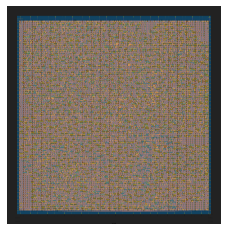

In [ ]:
!pip install cairosvg
!pip install matplotlib
import pathlib
import gdstk
import IPython.display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cairosvg

gdss = sorted(pathlib.Path('openlane_soc').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('soc_gds.svg')
cairosvg.svg2png(url='soc_gds.svg', write_to='soc_gds.png',dpi=200)
gds_png = mpimg.imread('soc_gds.png')
plt.imshow(gds_png)
plt.axis('off')
plt.show()

##### Dump Flow Report

In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('openlane_soc').glob('*/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

,0
design,/content
design_name,soc_top
config,RUN_2022.11.21_16.28.54
flow_status,flow completed
total_runtime,0h16m1s0ms
routed_runtime,0h8m10s0ms
(Cell/mm^2)/Core_Util,93466.605833
DIEAREA_mm^2,0.310922
CellPer_mm^2,21497.319342
OpenDP_Util,23.66


#### Cache

##### Write configuration

In [ ]:
%%writefile config.tcl
set ::env(DESIGN_NAME) rvh_l1d_bank

set ::env(VERILOG_FILES) "\ 
GreenRio_uncore/rtl/cache/on_chip/*.v"

set ::env(CLOCK_PORT) "clk"

set ::env(PL_RANDOM_GLB_PLACEMENT) 0
set ::env(CLOCK_PERIOD) {20.0}
set ::env(RT_MAX_LAYER) {met4} 
set ::env(RUN_FILL_INSERTION) 1 
set ::env(RUN_TAP_DECAP_INSERTION) 1 
# set ::env(QUIT_ON_LVS_ERROR) "0" 
# set ::env(QUIT_ON_MAGIC_DRC) "0" 
# set ::env(QUIT_ON_NEGATIVE_WNS) "0" 
# set ::env(QUIT_ON_SLEW_VIOLATIONS) "0" 
# set ::env(QUIT_ON_TIMING_VIOLATIONS) "0" 
# set ::env(SYNTH_MAX_FANOUT) 20 
# set ::env(RUN_CVC) 0 
# set ::env(GRT_MAX_DIODE_INS_ITERS) 5 


# set ::env(FP_SIZING) absolute
# set ::env(DIE_AREA) "0 0 850 850"
set ::env(FP_CORE_UTIL) 20
set ::env(PL_TARGET_DENSITY) 0.21
set ::env(SYNTH_STRATEGY) "AREA 0"



# set ::env(DIODE_INSERTION_STRATEGY) 4

# disable klayout because of https://github.com/hdl/conda-eda/issues/175
set ::env(RUN_KLAYOUT) 0
# disable CVC because of https://github.com/hdl/conda-eda/issues/174
set ::env(RUN_CVC) 0

# set ::env(PL_RESIZER_TIMING_OPTIMIZATIONS) 1
# set ::env(GLB_RESIZER_TIMING_OPTIMIZATIONS) 1



Writing config.tcl


##### Run OpenLane flow

In [ ]:
import os
import pathlib
OPENLANE_ROOT=str(pathlib.Path('OpenLane').resolve())
PATH=os.environ['PATH']
%env PDK_ROOT={CONDA_PREFIX}/share/pdk
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env TCLLIBPATH={CONDA_PREFIX}/lib/tcllib1.20
%env OPENLANE_ROOT={OPENLANE_ROOT}
%env PATH={PATH}:{OPENLANE_ROOT}:{OPENLANE_ROOT}/scripts
%env OPENLANE_LOCAL_INSTALL=1
!flow.tcl -design . -ignore_mismatches
%mkdir openlane_cache
%mv runs/* ./openlane_cache

env: PDK_ROOT=/content/conda-env/share/pdk
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: TCLLIBPATH=/content/conda-env/lib/tcllib1.20
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/content/conda-env/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts
env: OPENLANE_LOCAL_INSTALL=1
OpenLane ff85171cfb10dc44911db7a62cc2d86f03807756
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[WARNING]: OpenLane may not function properly: 'OL_INSTALL_DIR'
The version of open_pdks used in building the PDK does not match the version OpenLane was tested on (installed: a519523b0d9bc913a6f87a5eed083597ed9e2e93, tested: 3af133706e554a740cfe60f21e7

##### Display Layout

Due to the limit of colab memory, the flow result can't be dispalyed properly here. We have completed this flow in our local server, and use Klayout to open and take a screenshot. If you want, you can also try to run this jupyter notebook on your server and get GDSII file.

In [ ]:
# import pathlib
# import gdstk
# import IPython.display
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import cairosvg

# gdss = sorted(pathlib.Path('GreenRio_uncore/openlane_cache').glob('*/results/final/gds/*.gds'))
# library = gdstk.read_gds(gdss[-1])
# top_cells = library.top_level()
# top_cells[0].write_svg('cache_gds.svg')
# cairosvg.svg2png(url='cache_gds.svg', write_to='cache_gds.png',dpi=200)
# gds_png = mpimg.imread('cache_gds.png')
# plt.imshow(gds_png)
# plt.axis('off')
# plt.show()

![gds][gds_tag]

[gds_tag]: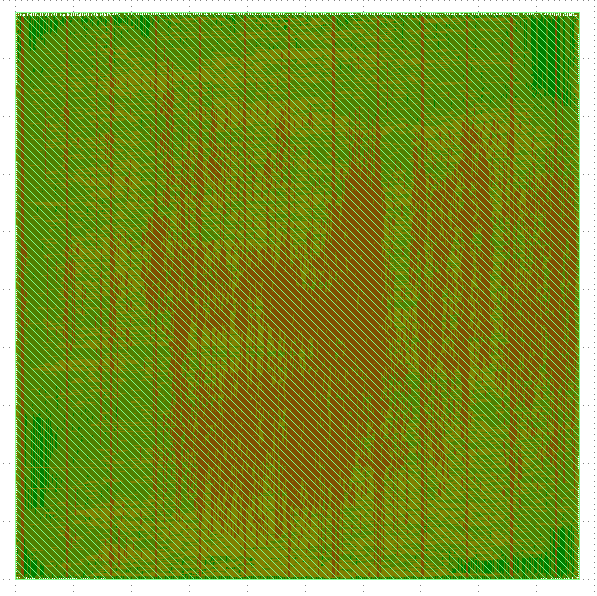

##### Dump Flow Report

In [ ]:
# import pandas as pd
# import pathlib

# pd.options.display.max_rows = None
# final_summary_reports = sorted(pathlib.Path('openlane_cache').glob('*/reports/metrics.csv'))
# df = pd.read_csv(final_summary_reports[-1])
# df.transpose()

,0
design,/openlane/designs/cache
design_name,rvh_l1d_bank
config,RUN_2022.11.23_04.02.21
flow_status,flow failed
total_runtime,7h14m13s0ms
routed_runtime,1h47m11s0ms
(Cell/mm^2)/Core_Util,-3.703704
DIEAREA_mm^2,3.807445
CellPer_mm^2,-1
OpenDP_Util,27.55


### Crypto Engine Backend Flow

Run crypto designs thru the [OpenLane](https://github.com/The-OpenROAD-Project/OpenLane/) GDS to RTL flow targeting the [open source SKY130 PDK](https://github.com/google/skywater-pdk/) based on OpemMPW-7 Project template.

#### **Why Not Colab Jupyter?** **（Important!)**
<mark>**Issue: Large memory usage (over 50 GB) of backend EDA flow exceeds the upper limit of available memory of CoLab Pro (25GB) due to the design complexity !!!**</mark>

Our design is based on the iteration of GreenRio 1.0 (which has been passed pre-check in OpenMPW-7).

We tried to run GrayRio with Openlane it in Colab.

Unfortunately, because of the **high memory usage**, Colab always ended the process because OpenROAD unexpectedly exited. We have upgraded to Colab Pro, but the memory usage still exceeded 25GB, which occurs in detailed routing. 

**In order to keep pace with the core design**, we will synchronize the Crypto Engine process with it (The same students are responsible for developing core and integrating crypto engine). Of course, the designs in this section (sha3 and trng) can be completed through the Colab.

***Solution:***

Therefore, we have to run the RTL-GDS flow locally based on the efabless template. 

We put the deployment guidance of the experimental environment below and give our experimental results. 

Please follow the steps below to perform replication and research on the local machine (memory capacity is recommended to be greater than 32G).

**Our experimental platform**: 128G of memory (the actual maximum occupied is 44G).



#### Starting our project
We created a new repository based on the caravel_user_project template. Therefore, the deployment steps are the same.

#### SHA3 OpenLane Flow

In [ ]:
## The code here cannot be run directly in the colab! Please note that! The code here suggests that you run it on a local machine.
## Code cannot be run in Colab here
!git clone https://github.com/0616ygh/GreenRio2Chip.git
!cd GreenRio2Chip
!source env.sh
!make setup
!cd openlane
## for sha3 module with openlane flow
!make sha3

#### TRNG OpenLane Flow

In [ ]:
## The code here cannot be run directly in the colab! Please note that! The code here suggests that you run it on a local machine.
## Code cannot be run in Colab here
!git clone https://github.com/0616ygh/GreenRio2Chip.git
!cd GreenRio2Chip
!source env.sh
!make setup
!cd openlane
## for trng module with openlane flow
!make trng

 After "*make design_name*", the flow of RTL-GDS starts running. Here are our results.This experimental result has been put on gitlab.

In [ ]:
!git clone https://gitlab.com/yghlovelyf0616/greenrio2result.git

Cloning into 'greenrio2result'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 243 (delta 62), reused 100 (delta 55), pack-reused 129
Receiving objects: 100% (243/243), 397.82 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Checking out files: 100% (217/217), done.


#### Display layout: SHA3

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


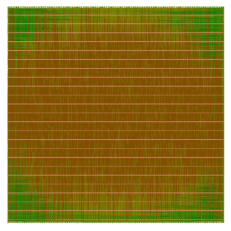

In [ ]:
##The current GDS size is 789MB, which takes too long to open in Python. We use Klayout to open and take a screenshot. If you want, you can also try to open it with klayout or the optimized Python script.
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
lena = mpimg.imread('greenrio2result/crypto_engine_result/sha3.jpg') 
lena.shape [:3]
plt.imshow(lena) 
plt.axis('off') 
plt.show()

#### Dump flow report: SHA3

In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('greenrio2result').glob('crypto_engine_result/sha3/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

,0
design,/home/yinguohua/rioschip/openlane/sha3
design_name,sha3_core
config,22_11_25_22_09
flow_status,flow completed
total_runtime,0h53m8s0ms
routed_runtime,0h19m19s0ms
(Cell/mm^2)/Core_Util,-2.0
DIEAREA_mm^2,3.4596
CellPer_mm^2,-1
OpenDP_Util,7.16


#### Display layout: TRNG

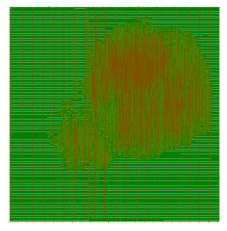

In [ ]:
##The current GDS size is 789MB, which takes too long to open in Python. We use Klayout to open and take a screenshot. If you want, you can also try to open it with klayout or the optimized Python script.
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
lena = mpimg.imread('greenrio2result/crypto_engine_result/trng.jpg') 
lena.shape [:3]
plt.imshow(lena) 
plt.axis('off') 
plt.show()

#### Dump flow report: TRNG

In [ ]:
import pandas as pd
import pathlib

pd.options.display.max_rows = None
final_summary_reports = sorted(pathlib.Path('greenrio2result').glob('crypto_engine_result/trng/reports/metrics.csv'))
df = pd.read_csv(final_summary_reports[-1])
df.transpose()

,0
design,/home/yinguohua/rioschip/openlane/rng
design_name,trng
config,22_11_25_21_37
flow_status,flow completed
total_runtime,0h18m40s0ms
routed_runtime,0h10m24s0ms
(Cell/mm^2)/Core_Util,-2.0
DIEAREA_mm^2,2.496
CellPer_mm^2,-1
OpenDP_Util,10.81


## Import Source Code

In [ ]:
%cd /content/
!rm -rf GreenRio_uncore
!git clone https://github.com/zhengxuan-luan/GreenRio_uncore.git
!rm -rf GreenRio2_Core
!git clone https://github.com/0616ygh/GreenRio2_Core.git

/content
Cloning into 'GreenRio_uncore'...
remote: Enumerating objects: 606, done.
remote: Counting objects: 100% (606/606), done.
remote: Compressing objects: 100% (424/424), done.
remote: Total 606 (delta 195), reused 567 (delta 161), pack-reused 0
Receiving objects: 100% (606/606), 4.06 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (195/195), done.
Cloning into 'GreenRio2_Core'...
remote: Enumerating objects: 1070, done.
remote: Counting objects: 100% (794/794), done.
remote: Compressing objects: 100% (450/450), done.
remote: Total 1070 (delta 394), reused 698 (delta 318), pack-reused 276
Receiving objects: 100% (1070/1070), 6.25 MiB | 25.09 MiB/s, done.
Resolving deltas: 100% (467/467), done.


## Design Verification

1. install verilator and its dependecies
2. run benchmark to verify both performance and correctness
  - command in /content/GreenRio2_Core/ : "make"
  - The core can pass all the test in the *GreenRio2_Core/dv/benchmark*, *GreenRio2_Core/dv/isa* and *GreenRio2_Core/dv/torture*
  - The command to run the verification in /content/GreenRio2_Core/ can be "make HEX_FILE=dv/isa/hex/rv64ui/add.hex"
3. execute the C model of the same benchmark 
4. run uncore verification the same as core verification

In [ ]:
!sudo apt-get install git perl python3 make autoconf g++ flex bison ccache
!sudo apt-get install libgoogle-perftools-dev numactl perl-doc
!sudo apt-get install libfl2  # Ubuntu only (ignore if gives error)
!sudo apt-get install libfl-dev  # Ubuntu only (ignore if gives error)
!sudo apt-get install zlibc zlib1g zlib1g-dev  # Ubuntu only (ignore if gives error)
%cd /content
!git clone https://github.com/verilator/verilator   # Only first time

# Every time you need to build:
%cd verilator
!git pull         # Make sure git repository is up-to-date
!git checkout v4.224 

!autoconf         # Create ./configure script
!./configure      # Configure and create Makefile
!make -j `nproc`
!sudo make install
verilator_bin_path = pathlib.Path('bin')
VERILATOR_PATH = str(verilator_bin_path.resolve())
%env PATH={VERILATOR_PATH}:{PATH}
%cd ..

Reading package lists... Done
Building dependency tree       
Reading state information... Done
autoconf is already the newest version (2.69-11).
bison is already the newest version (2:3.0.4.dfsg-1build1).
ccache is already the newest version (3.4.1-1).
flex is already the newest version (2.6.4-6).
make is already the newest version (4.1-9.1ubuntu1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.13).
perl is already the newest version (5.26.1-6ubuntu0.6).
python3 is already the newest version (3.6.7-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgoogle-perftools-dev is already the newest version (2.5-2.2ubuntu3).
numactl is already the newest version (2.0.11-2.1ub

### Core Verification Flow

In [ ]:
## Frontend Verification Flow
%cd GreenRio2_Core/
!git pull
!ls
!make
%cd ..

fatal: destination path 'GreenRio2_Core' already exists and is not an empty directory.
/content/GreenRio2_Core
Already up to date.
cache_ebi  decode  fu		logs	   perips     rvh_l1d
core.sv    dv	   hehe_cfg.vh	lsuv1	   phyreg     rvh_mmu_v
core_top   exc	   images	Makefile   rcu	      tb_top.sv
csr	   fetch   include	params.vh  README.md  utils
verilator -Mdir build --timescale 1ns/1ps --timescale-override 1ns/1ps --prof-cfuncs -CFLAGS -DVL_DEBUG --Wno-WIDTH --Wno-PINMISSING --Wno-VARHIDDEN --Wno-UNUSED --Wno-STMTDLY --Wno-ASSIGNDLY --Wno-EOFNEWLINE --Wno-IMPLICIT --Wno-LITENDIAN --Wno-SELRANGE --Wno-UNOPTFLAT --Wno-WIDTHCONCAT --Wno-REDEFMACRO --Wno-REALCVT --Wno-LATCH --Wno-CASEINCOMPLETE --cc --trace --exe --build +define+VERILATOR+DPRAM64_2R1W+SYNTHESIS+LSU_V1+HEX_DIR="\"./dv/benchmark/hex/aha-mont64.hex\"" --top-module tb_top ./tb_top.sv ./rcu/unit/oldest2_abitter/oldest2_abitter.v ./rcu/unit/oldest2_abitter/arbiter_base.v ./rcu/unit/oldest2_abitter_bps_lss/oldest2_abitter_bps_lss

### Performance Model Simulation

In [ ]:
# C-Model of GreenRio 2

## Get C-Model Code

# According to our tests, the current environment does not support getting submodule by the following commands: `git submodule init; git submodule update`. That means we can only add thirdPrty libraries into our repository directly and allow you download them at the same time. But we provide `.gitmodules` to record their original sites.

%%time

!rm -r model-greenrio2/; git clone https://github.com/XiakaiPan/model-greenrio2.git

## Enter Model Directory and Compile it




### Build Model

# Execute the following commands to build model, it might cost your about 2 minutes.

# %%time

!cd model-greenrio2/; echo `pwd`; ls; make buildRelease
!cd ..
### Configure Your Design in a YAML file.

# We configure our architecture of PicoRio 2.0 in config/gr-2i.yml, which is a 2-issue out-of-order superscalar RISC-V SoC.

### Benchmark Test

# We use dhrystone and embench-aha-mont64 as benchmark to test execution situation.

# It will need about 3 minutes to finish tests without building and 5+ minutes for compiling from the begining.

# %%time

!cd model-greenrio2/; make regression
!cd ..

Cloning into 'model-greenrio2'...
remote: Enumerating objects: 1057, done.
remote: Counting objects: 100% (1057/1057), done.
remote: Compressing objects: 100% (820/820), done.
remote: Total 1057 (delta 221), reused 1051 (delta 215), pack-reused 0
Receiving objects: 100% (1057/1057), 5.87 MiB | 18.91 MiB/s, done.
Resolving deltas: 100% (221/221), done.
/content/model-greenrio2
CMakeLists.txt	config	Makefile  model  README.md  src  thirdParty
mkdir -p build_release && cd build_release && cmake -DCMAKE_BUILD_TYPE=Release -DTRACE_ON=OFF .. && make -j8 && cp model ../
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
--

### Uncore Verification Flow

In [ ]:
## uncore verification
%cd GreenRio_uncore/
%env SRC_ROOT = rtl
%env DV_ROOT = dv
!make verify_soc
!make verify_cache
%cd ..

流式输出内容被截断，只能显示最后 5000 行内容。


cycle =               197670 , cpu           0 , load
rob tag 100
ldaddr 0000
cycle =               197670, change true result, save 00


cycle =               197671 , cpu           0 , load
rob tag 100
ldaddr 0000
cycle =               197671, change true result, save 00


cycle =               197672 , cpu           0 , load
rob tag 100
ldaddr 0000
cycle =               197672, change true result, save 00


cycle =               197673 , cpu           0 , load
rob tag 100
ldaddr 0000
cycle =               197673, change true result, save 00


cycle =               197674 , cpu           0 , load
rob tag 100
ldaddr 0000
cycle =               197674, change true result, save 00


cycle =               197675 , cpu           0 , load
rob tag 100
ldaddr 0000
cycle =               197675, change true result, save 00


cycle =               197676 , cpu           0 , load
rob tag 100
ldaddr 0000
cycle =               197676, change true result, save 00


cycle

## Future Work
We have finished the design and the EDA flow of our three main modules: GrayRio Security Module, GreenRio Core, and RainbowRio SoC, respectively. Our future plan includes the following tasks:

1.Integrate the RTL design of three modules as a full system;

2.Boot Linux with GreenRio Core and RainbowRio Soc as further verification of our chip design;

3.Boot Keystone TEE with the full-system GrayRio;

4.Finish the tapeout flow of GrayRio using OpenEDA toolchains.

## Reference
[1]ARM TrustZone,infocenter.arm.com/help/topic/com.arm.doc.prd29-genc-009492c/PRD29-GENC-009492C_trustzone_security_whitepaper.pdf.2013

[2]David Kaplan, Jeremy Powell, Tom Woller. AMD memory encryption[J]. White paper, 2016. 

[3]Dayeol Lee, David Kohlbrenner, Shweta Shinde, Krste Asanović, and Dawn Song. Keystone: An Open Framework for Architecting Trusted Execution Environments, EuroSys’2021. 

[4]Mohamed Shalan and Tim Edwards. Building OpenLANE: a 130nm openroad-based tapeout-proven flow, ICCAD’2020. 

[5]R. Timothy Edwards. Google/SkyWater and the Promise of the Open PDK, WOSET’2020. 

[6]Tutu Ajayi, Vidya A. Chhabria, Mateus Fogaça, Soheil Hashemi, Abdelrahman Hosny, Andrew B. Kahng, Minsoo Kim, Jeongsup Lee, Uday Mallappa, Marina Neseem, Geraldo Pradipta, Sherief Reda, Mehdi Saligane, Sachin S. Sapatnekar, Carl Sechen, Mohamed Shalan, William Swartz, Lutong Wang, Zhehong Wang, Mingyu Woo, and Bangqi Xu. Toward an open-source digital flow: First Learnings From the OpenRoad Project. DAC’2019. 